In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
# Same routine
# load MNIST dataset from outside working dir
parent = os.path.split(os.getcwd())[0]
print(parent)
data_path = parent + "\mnist_784_version1.pkl"
print(data_path)

with open(data_path, "rb") as file:
    mnist = pickle.load(file)
print(mnist.keys())

X = mnist.data.to_numpy()
y = mnist.target.to_numpy()
print("shape of feature:", X.shape)
print("dtype of feature:", X.dtype)
print("shape of target:", y.shape)
print("dtype of target:", y.dtype)

y = y.astype(np.uint8)
print("new dtype:", y.dtype)

# Splitting
X_train, X_test, y_train, y_test = X[:60000, :], X[60000:, :], y[:60000], y[60000:]

# training set
print(X_train.shape)
print(y_train.shape)
# test set 
print(X_test.shape)
print(y_test.shape)

c:\Users\nagat\desktop\handonml
c:\Users\nagat\desktop\handonml\mnist_784_version1.pkl
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
shape of feature: (70000, 784)
dtype of feature: float64
shape of target: (70000,)
dtype of target: object
new dtype: uint8
(60000, 784)
(60000,)
(10000, 784)
(10000,)


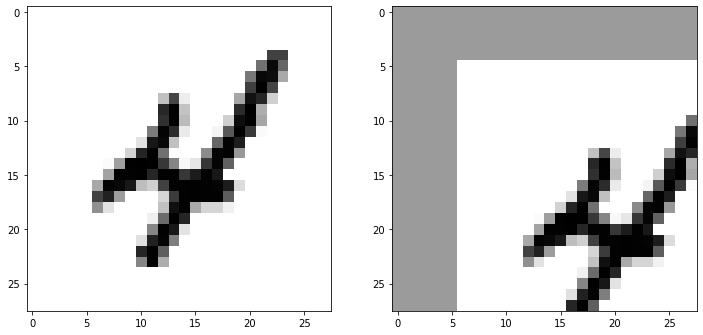

In [3]:
# let's try image manipulation via scipy (specifically "shift")
from scipy.ndimage.interpolation import shift

some_image = 9 
test = shift(X_train[some_image].reshape((28, 28)), shift=(5, 6), cval=100)
fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].imshow(X_train[some_image].reshape((28, 28)), cmap="binary")
axes[1].imshow(test, cmap="binary")

In [4]:
# now let's shift each image in training to left, right, up, down by 1 pixel 
# and then "augment" them to training set
from Shiftimage import shift_images

new_X_train, new_y_train = shift_images(X_train, y_train)

In [7]:
# now we have a bigger training set
print(new_X_train.shape)
print(new_y_train.shape)

(300000, 784)
(300000,)


Labels : 
 [[5 5 5 5]
 [0 0 0 0]
 [4 4 4 4]
 [1 1 1 1]]


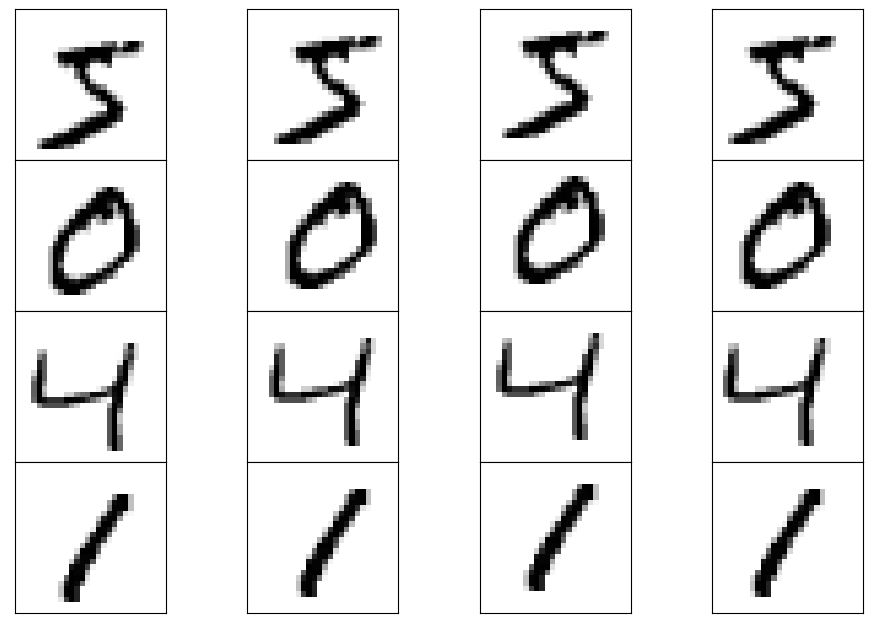

In [10]:
# let's us visualize the added instance
from multipleimages import multiple_images

multiple_images(new_X_train[60000:60016], 4, 4)
print("Labels : \n", new_y_train[60000:60016].reshape((4, 4)))

# well it was just slightly changes but you can still see that imaged in col 3 got shifted up a bit.

In [11]:
# now we have a augmented training set 
# let's re-fit my previous model with this training set
with open("knnmodel.pkl", "rb") as file:
    knn_clf = pickle.load(file)
    print(knn_clf)

KNeighborsClassifier(n_neighbors=4, weights='distance')


In [12]:
# re-fitting
knn_clf.fit(new_X_train, new_y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [13]:
# And now let's see how well the model can generalize on test set
from sklearn.metrics import accuracy_score

pred = knn_clf.predict(X_test)
acc_score = accuracy_score(y_true=y_test, y_pred=pred)
print("Accuracy score on test set :", acc_score) #Accuracy score on test set : 0.9763

Accuracy score on test set : 0.9763


In [14]:
# YES!!! the augmented training improve my model's generalization ability 0.5%
# WOW!!!
# let's save it
# with open("augmentedknnmodel.pkl", "wb") as file:
#     pickle.dump(knn_clf, file)